In [6]:
%load_ext autoreload
%autoreload 2
%run ./initializer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Path (/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1) already exists in sys.path


In [7]:
from random_forest_classifier_2a import RandomForestMoodModel, plot_predicted_vs_actual
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from data_loading import DataPreprocessor

In [ ]:
data_loader = DataPreprocessor()
train_df, test_df = data_loader.load_and_preprocess_data("1d", 0.25, 1, for_RNN_model=False)

Removed 64 outliers from 1268 observations. Percentage: 5.05%


In [9]:
# 1. Prepare features and labels, filtering rare classes
label_counts = train_df['mood'].value_counts()
valid_labels = label_counts[label_counts >= 2].index
train_df_filtered = train_df[train_df['mood'].isin(valid_labels)]

# Keep date column for evaluation
dates = train_df_filtered['date']

# Then drop id, mood, and date for features
features = train_df_filtered.drop(columns=['id', 'mood', 'date'])
labels = train_df_filtered['mood']

# Train-validation split
X_train, X_val, y_train, y_val, dates_train, dates_val = train_test_split(
    features, labels, dates, test_size=0.2, stratify=labels, random_state=42
)

# 3. Train the classifier with class weights
model = RandomForestMoodModel(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# 4. Evaluate on validation set
val_preds = model.predict(X_val)
print("\nValidation Report:")
print(classification_report(y_val, val_preds))

# 5. Predict on test set
X_test = test_df.drop(columns=['id', 'mood', 'date'])
test_preds = model.predict(X_test)

# 6. Attach predictions
test_df_with_preds = test_df.copy()
test_df_with_preds['predicted_mood_class'] = test_preds

# 7. Output predictions
print(test_df_with_preds[['id', 'predicted_mood_class']])


Validation Report:
              precision    recall  f1-score   support

          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         1
          20       0.00      0.00      0.00         1
          21       0.00      0.00      0.00         1
          22       0.00      0.00      0.00         4
          23       0.00      0.00      0.00         3
          24       0.50      0.08      0.13        13
          25       0.00      0.00      0.00        13
          26       0.20      0.05      0.08        21
          27       0.20      0.05      0.08        20
          28       0.28      0.83      0.41        58
          29       0.28      0.19      0.22        27
          30       0.22      0.08      0.12        25
          31       0.11      0.05      0.07        19
          32       0.18      0.08      0.11        25
          33       0.00      0.00      0.00         4
          34       0.00      0.00      0.00         2
       

/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rik/Documents/VU/DMT/DataMiningTechniquesA1/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Daily average RMSE: 1.773539729237498
Mean Error: -0.08672335600907012


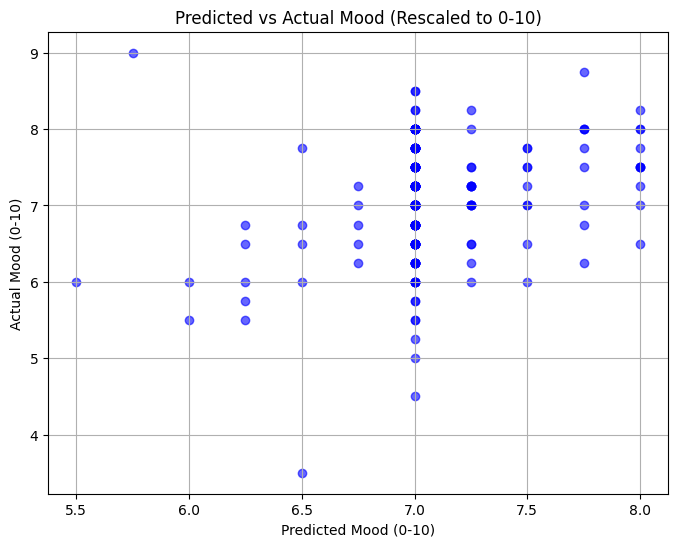

In [10]:
rmse, mean_error = model.evaluate_daily_average_performance(y_val, val_preds, dates_val)
print("Daily average RMSE:", rmse)
print("Mean Error:", mean_error)

plot_predicted_vs_actual(y_val, val_preds)